In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
                
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-black-money-transactions-dataset/Big_Black_Money_Dataset.csv


In [2]:
#load the data 
filepath=('/kaggle/input/global-black-money-transactions-dataset/Big_Black_Money_Dataset.csv')
transact=pd.read_csv(filepath)

In [3]:
#load the modules
import seaborn as sns 
import matplotlib.pyplot as plt 
#set the chart work out 
sns.set(style="whitegrid")

In [4]:
#know missing values 
transact_na=transact.isnull().sum()
transact_na.tail(10)

Date of Transaction            0
Person Involved                0
Industry                       0
Destination Country            0
Reported by Authority          0
Source of Money                0
Money Laundering Risk Score    0
Shell Companies Involved       0
Financial Institution          0
Tax Haven Country              0
dtype: int64

In [5]:
#get to know the info
transact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Amount (USD)                 10000 non-null  float64
 3   Transaction Type             10000 non-null  object 
 4   Date of Transaction          10000 non-null  object 
 5   Person Involved              10000 non-null  object 
 6   Industry                     10000 non-null  object 
 7   Destination Country          10000 non-null  object 
 8   Reported by Authority        10000 non-null  bool   
 9   Source of Money              10000 non-null  object 
 10  Money Laundering Risk Score  10000 non-null  int64  
 11  Shell Companies Involved     10000 non-null  int64  
 12  Financial Institution        10000 non-null  object 
 13  Tax Haven Country

In [6]:
#summary of the dataset
transact.describe()

,Amount (USD),Money Laundering Risk Score,Shell Companies Involved
count,1.000000e+04,10000.000000,10000.000000
mean,2.501818e+06,5.526400,4.469400
std,1.424364e+06,2.893603,2.879773
min,1.003180e+04,1.000000,0.000000
25%,1.279005e+06,3.000000,2.000000
50%,2.501310e+06,6.000000,4.000000
75%,3.722416e+06,8.000000,7.000000
max,4.999812e+06,10.000000,9.000000


In [7]:
#sort according money laundering 
transact.sort_values(by=["Money Laundering Risk Score", "Date of Transaction"],ascending=False).head(10)

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
9998,TX0000009999,Brazil,2.233581e+06,Offshore Transfer,2014-02-21 14:00:00,Person_2799,Real Estate,Russia,True,Illegal,10,5,Bank_12,Singapore
9996,TX0000009997,UAE,4.800338e+06,Property Purchase,2014-02-21 12:00:00,Person_6348,Luxury Goods,Russia,False,Legal,10,2,Bank_449,Luxembourg
9988,TX0000009989,UAE,2.617680e+06,Stocks Transfer,2014-02-21 04:00:00,Person_3001,Construction,China,False,Illegal,10,8,Bank_47,Bahamas
9981,TX0000009982,China,9.953155e+05,Cryptocurrency,2014-02-20 21:00:00,Person_5862,Arms Trade,UAE,False,Illegal,10,4,Bank_135,Panama
9962,TX0000009963,UAE,4.494310e+06,Property Purchase,2014-02-20 02:00:00,Person_4276,Arms Trade,Russia,True,Illegal,10,9,Bank_177,Switzerland
9955,TX0000009956,China,4.330120e+06,Stocks Transfer,2014-02-19 19:00:00,Person_2844,Finance,Brazil,True,Legal,10,6,Bank_22,Singapore
9952,TX0000009953,Russia,8.044852e+05,Cash Withdrawal,2014-02-19 16:00:00,Person_7592,Finance,USA,False,Illegal,10,4,Bank_318,Luxembourg
9947,TX0000009948,Russia,2.697183e+06,Property Purchase,2014-02-19 11:00:00,Person_8784,Luxury Goods,UK,False,Legal,10,9,Bank_135,Panama
9931,TX0000009932,USA,3.991517e+06,Offshore Transfer,2014-02-18 19:00:00,Person_1812,Finance,USA,False,Illegal,10,1,Bank_26,Cayman Islands
9929,TX0000009930,UAE,3.753640e+06,Offshore Transfer,2014-02-18 17:00:00,Person_3848,Casinos,Brazil,False,Illegal,10,9,Bank_68,Luxembourg


In [8]:
#get the mean agggregate of  amounts the countries got if illegal or legal
#transact[['Amount[USD]', 'Country']].groupby('Country').mean()

In [9]:
transact.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


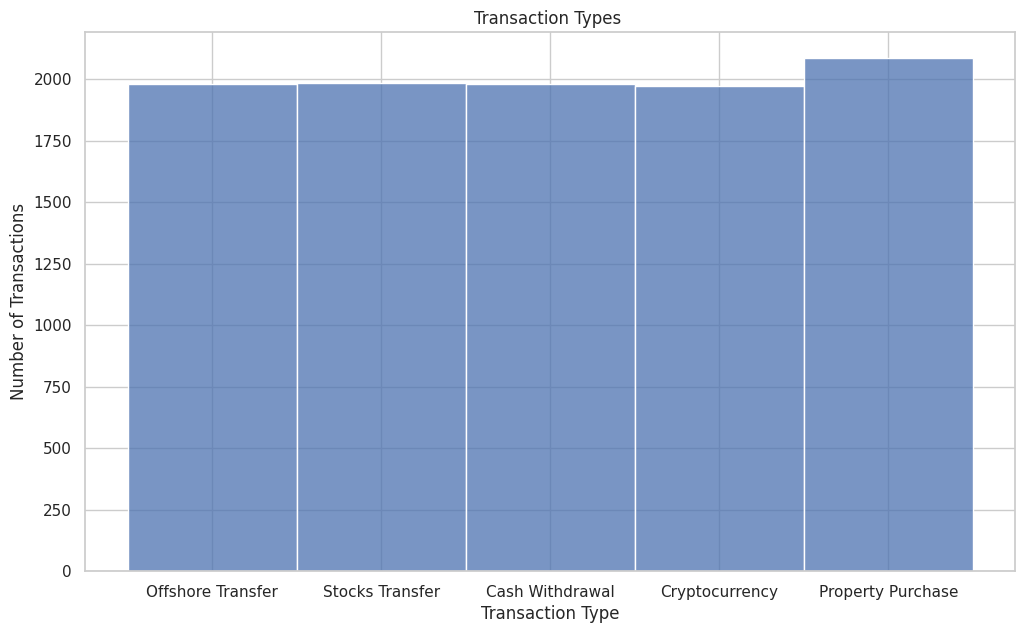

In [10]:
#histogram of transactions types and their values 
plt.figure(figsize=(12, 7))
sns.histplot(data=transact, x='Transaction Type')
plt.title('Transaction Types ')
plt.ylabel('Number of Transactions')
plt.show()


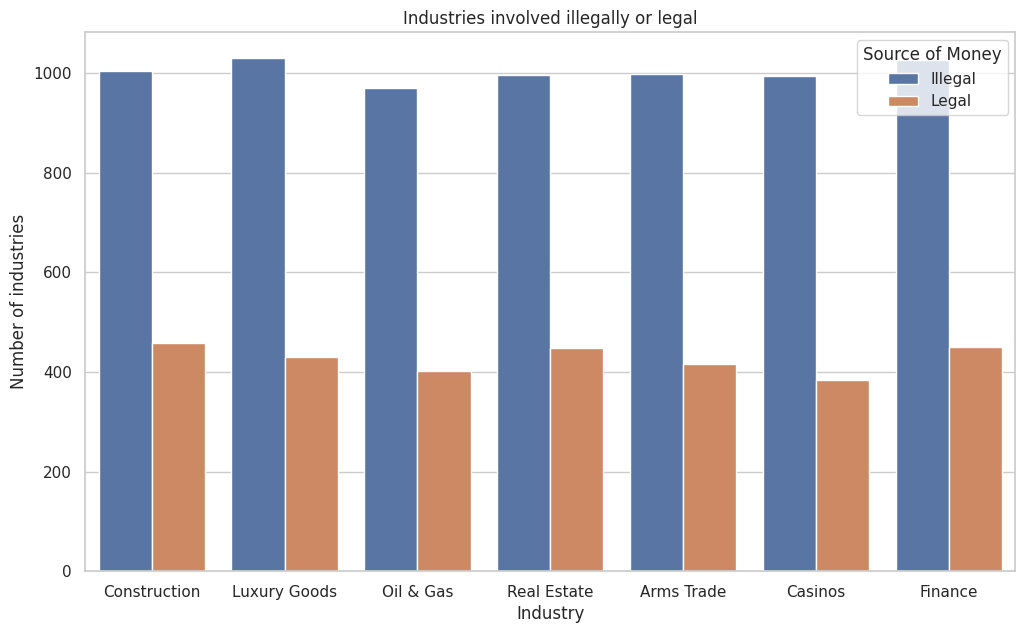

In [11]:
#Industries involved inrelation to the destinations of transactions
plt.figure(figsize=(12,7))
sns.countplot(data=transact, hue='Source of Money', x='Industry')
plt.xlabel('Industry')
plt.ylabel('Number of industries')
plt.title('Industries involved illegally or legal')
plt.show()


**FROM OUR INTRODUCTION, To get why some illegal activities not reported to authority  on the black money trasaction 
******

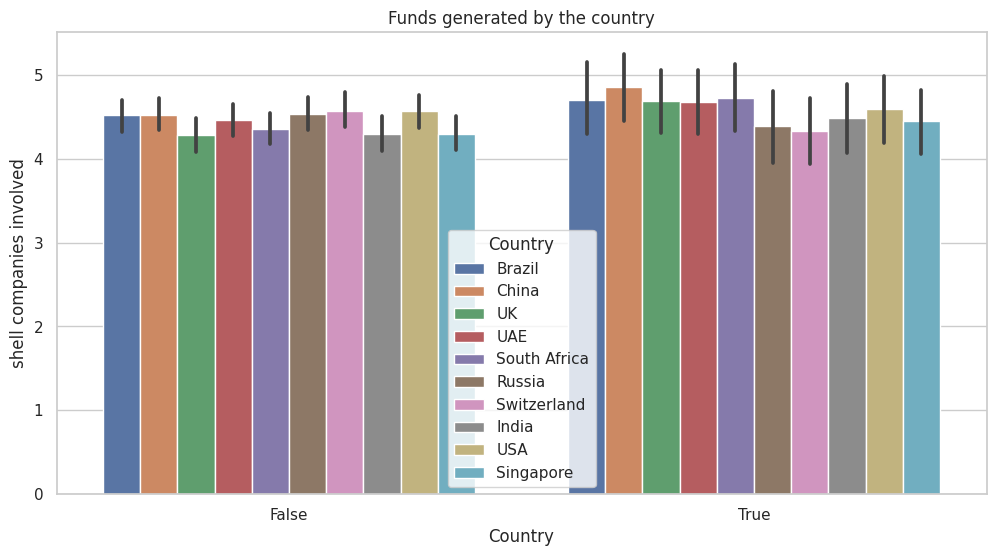

In [12]:
#Funds generated by countries 
plt.figure(figsize=(12,6))
plt.title('Funds generated by the country')
sns.barplot(data=transact, x='Reported by Authority', hue='Country',y='Shell Companies Involved')
plt.xlabel('Country')
plt.ylabel('shell companies involved')
plt.show()

# >SOME COUNTRIES HAVE HIGH RISK SCORE 
1. It can be due to weak security in the country for example India 
2. Some governments collaborated in the black money transaction due some were nt reported 
3.Some countries had good terms with the destinations of the goods making the risk score be lower .
 ****

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


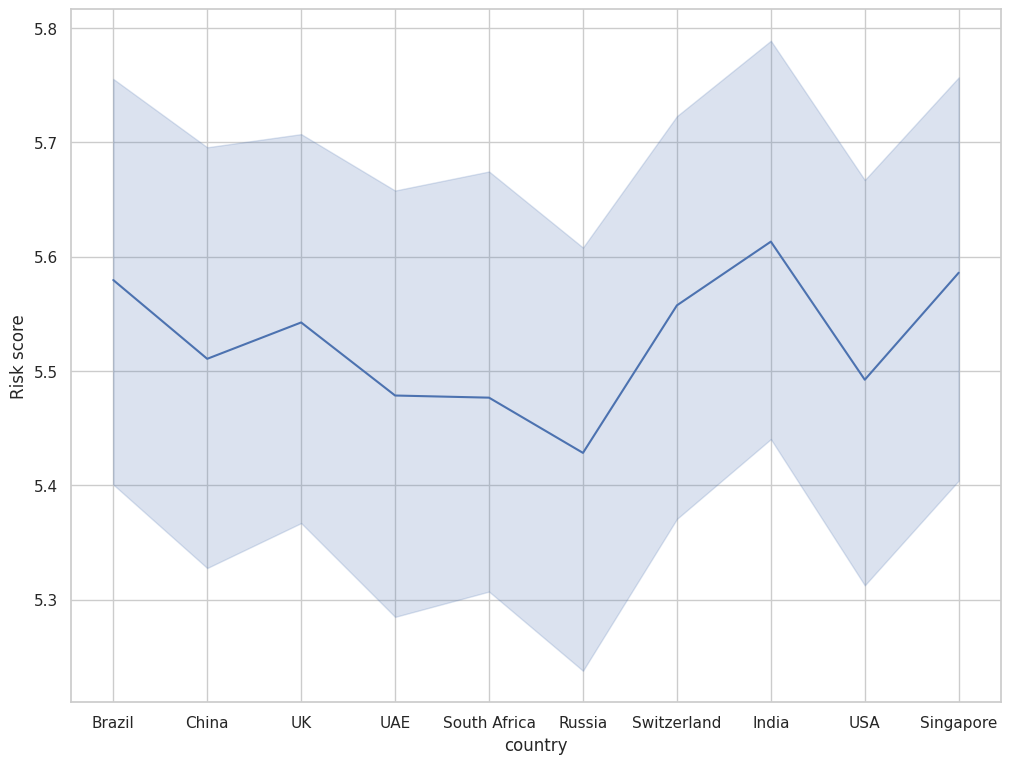

In [13]:
#countries participated in high schemes 
plt.figure(figsize=(12,9))
sns.lineplot(data=transact, x='Country', y='Money Laundering Risk Score')
plt.xlabel('country')
plt.ylabel('Risk score')
plt.show()

# MY REPORT 
****

1. INTRODUCTION
Problems Faced- illegal activities in money transaction taking place , and almost all countries are participating in it .Investments in most countries with unique peopele avoid legal actions .
Solution - To know why some cases not reported . 
   
2. #DATA USED TO COMPLETE THE PROJECT 
  Examples used - used pd is null imported from numpy to know if missing values .
                 import pandas to work out on sorting and summarizing the whole dataset .
********         Got the mean of the calculatins involving the amount generated 
   Steps Taken - Combinig with the graphs and charts to make a meaning ful expression .
                  Plotting charts 
              
# 3. ANALYSIS 
   Seaborn was used for data visulization 
   Matplotlibrary 
   No external Sources used . 
     
   Significant findings 
     ****

1. #Government also took part in the money transaction not just the shelll companies .
2. Weak government security threatened in some countries .For example India 
3. Illegal sources o money were money were highly involved. mostly around two times much than the legal  source of money came from .
4.Finance is highly in collaborate in transactions leading to be the most source of illegal money transaction taking place. 
5. Shell companies involved being in high numeber and due have a bad reputation in fraud money laudering in researches 
 thus most capable in working illegaly in the black money scheme .
6. Unique id people were used to reduce the tracing and reporting to be difficult thus illegal activities were higher.
   
   
# RESULTS AND CONCLUSION 
  Summary is that the money laundering tookl a wide steer in most countries due support of the government. 
          Amount of money generated from the scheme has made finance to be the black money transaction bridge. **** 
    
  Recommendations 
        - Private Organisations to intervene to stop the government in acquiring illegally.
        -Countries should have private sectors that can question the government on this money laundering schemes.
****